In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
#1. Read  the file
Columns = ['Times_Pregnant','PG_Concnetration','Blood_Pressure','Triceps_thickness','Serum_insulin','BMI','Diabetes_Pedigree','Age','Class']
pima_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data",names= Columns)

In [3]:
pima_df.head()

,Times_Pregnant,PG_Concnetration,Blood_Pressure,Triceps_thickness,Serum_insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df.shape

(768, 9)

In [6]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Times_Pregnant       768 non-null int64
PG_Concnetration     768 non-null int64
Blood_Pressure       768 non-null int64
Triceps_thickness    768 non-null int64
Serum_insulin        768 non-null int64
BMI                  768 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


(array([  35.,    1.,    2.,   13.,  107.,  261.,  243.,   87.,   14.,    5.]),
 array([   0. ,   12.2,   24.4,   36.6,   48.8,   61. ,   73.2,   85.4,
          97.6,  109.8,  122. ]),
 <a list of 10 Patch objects>)

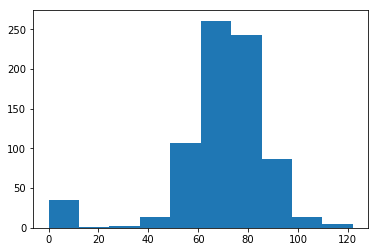

In [9]:
plt.hist(pima_df['Blood_Pressure'])

In [10]:
# blood pressure of 0 is invalid, so impute it with median values
pima_df.loc[pima_df.Blood_Pressure == 0, 'Blood_Pressure'] = pima_df.Blood_Pressure.median()

(array([   3.,    2.,   35.,  118.,  261.,  214.,  105.,   18.,   10.,    2.]),
 array([  24. ,   33.8,   43.6,   53.4,   63.2,   73. ,   82.8,   92.6,
         102.4,  112.2,  122. ]),
 <a list of 10 Patch objects>)

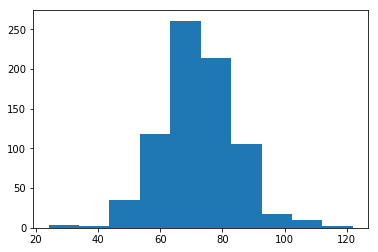

In [11]:
#Check again
plt.hist(pima_df['Blood_Pressure'])

(array([ 318.,  206.,  136.,   58.,   25.,   15.,    3.,    3.,    1.,    3.]),
 array([ 0.078 ,  0.3122,  0.5464,  0.7806,  1.0148,  1.249 ,  1.4832,
         1.7174,  1.9516,  2.1858,  2.42  ]),
 <a list of 10 Patch objects>)

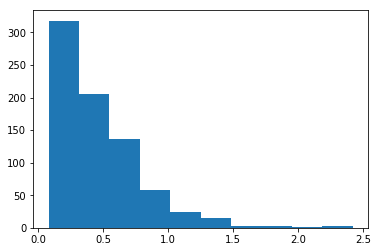

In [12]:
plt.hist(pima_df['Diabetes_Pedigree'])

(array([ 300.,  157.,   92.,   86.,   52.,   34.,   26.,   16.,    4.,    1.]),
 array([ 21.,  27.,  33.,  39.,  45.,  51.,  57.,  63.,  69.,  75.,  81.]),
 <a list of 10 Patch objects>)

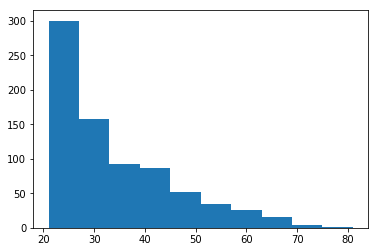

In [13]:
plt.hist(pima_df['Age'])

(array([  11.,    0.,   15.,  156.,  268.,  224.,   78.,   12.,    3.,    1.]),
 array([  0.  ,   6.71,  13.42,  20.13,  26.84,  33.55,  40.26,  46.97,
         53.68,  60.39,  67.1 ]),
 <a list of 10 Patch objects>)

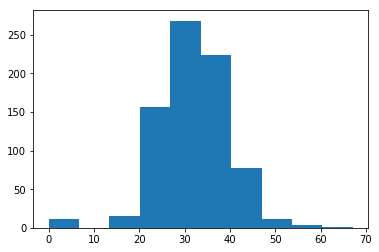

In [14]:
plt.hist(pima_df['BMI'])

In [15]:
## Body Mass Index of 0 is invalid, so impute it with median values
pima_df.loc[pima_df.BMI == 0, 'BMI'] = pima_df.BMI.median()

In [16]:
##Similarly check for Triceps_thickness & PG_Concnetration
pima_df.loc[pima_df.Triceps_thickness == 0, 'Triceps_thickness'] = pima_df.Triceps_thickness.median()
pima_df.loc[pima_df.PG_Concnetration == 0, 'PG_Concnetration'] = pima_df.PG_Concnetration.median()

In [17]:
#3.Univariate Analysis
#Check the distribution for dependent variable
pima_df.groupby("Class").agg({'Class': 'count'})

,Class
Class,
0,500
1,268


In [18]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Times_Pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
PG_Concnetration,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Blood_Pressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
Triceps_thickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Serum_insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
Diabetes_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [18]:
#data for all the attributes are skewed, especially for the variable "test", here median and mean having 50 point difference, 
#so it clearly indicates extreme long tail on the right...

# here the target column is 'class' to understand how the data is distributed amongst the various values

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

pima_df.groupby(["class"]).count()

,pregnant,plasma,pressure,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


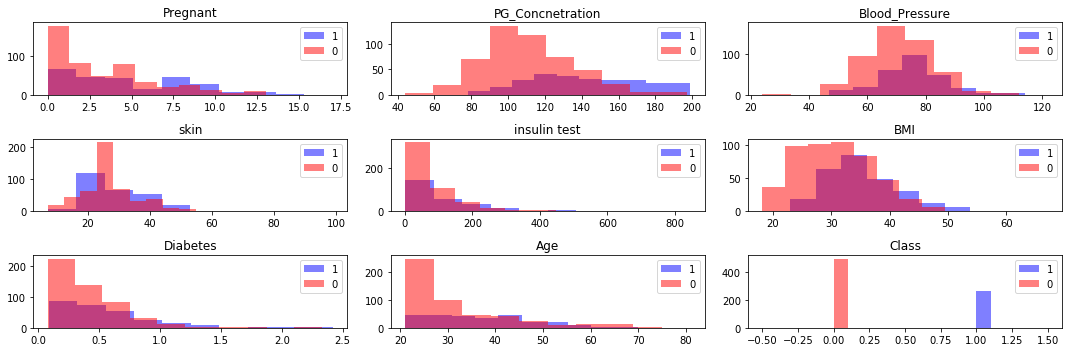

In [19]:
#Univariate graphs for each attribute grouped by class variable
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
num_bins = 10
#Times_Pregnant
ax1 = fig.add_subplot(331)
ax1.hist(np.array(pima_df[pima_df['Class']==1]['Times_Pregnant']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax1.hist(np.array(pima_df[pima_df['Class']==0]['Times_Pregnant']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("Pregnant")

#plasama
ax2 = fig.add_subplot(332)
ax2.hist(np.array(pima_df[pima_df['Class']==1]['PG_Concnetration']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax2.hist(np.array(pima_df[pima_df['Class']==0]['PG_Concnetration']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("PG_Concnetration")

#presssue
ax3 = fig.add_subplot(333)
ax3.hist(np.array(pima_df[pima_df['Class']==1]['Blood_Pressure']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax3.hist(np.array(pima_df[pima_df['Class']==0]['Blood_Pressure']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("Blood_Pressure")

#skin
ax4 = fig.add_subplot(334)
ax4.hist(np.array(pima_df[pima_df['Class']==1]['Triceps_thickness']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax4.hist(np.array(pima_df[pima_df['Class']==0]['Triceps_thickness']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("skin")

#test
ax5 = fig.add_subplot(335)
ax5.hist(np.array(pima_df[pima_df['Class']==1]['Serum_insulin']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax5.hist(np.array(pima_df[pima_df['Class']==0]['Serum_insulin']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("insulin test")

#mass Index
ax6 = fig.add_subplot(336)
ax6.hist(np.array(pima_df[pima_df['Class']==1]['BMI']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax6.hist(np.array(pima_df[pima_df['Class']==0]['BMI']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("BMI")

#pedigree
ax7 = fig.add_subplot(337)
ax7.hist(np.array(pima_df[pima_df['Class']==1]['Diabetes_Pedigree']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax7.hist(np.array(pima_df[pima_df['Class']==0]['Diabetes_Pedigree']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("Diabetes")

#age
ax8 = fig.add_subplot(338)
ax8.hist(np.array(pima_df[pima_df['Class']==1]['Age']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax8.hist(np.array(pima_df[pima_df['Class']==0]['Age']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("Age")

#class
ax9 = fig.add_subplot(339)
ax9.hist(np.array(pima_df[pima_df['Class']==1]['Class']), num_bins, normed=0, facecolor='blue', alpha=0.5,label="1")
ax9.hist(np.array(pima_df[pima_df['Class']==0]['Class']), num_bins, normed=0, facecolor='red', alpha=0.5,label="0")
plt.legend(loc='upper right')
plt.title("Class")
plt.tight_layout()
plt.show()


In [23]:
import seaborn as sns

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


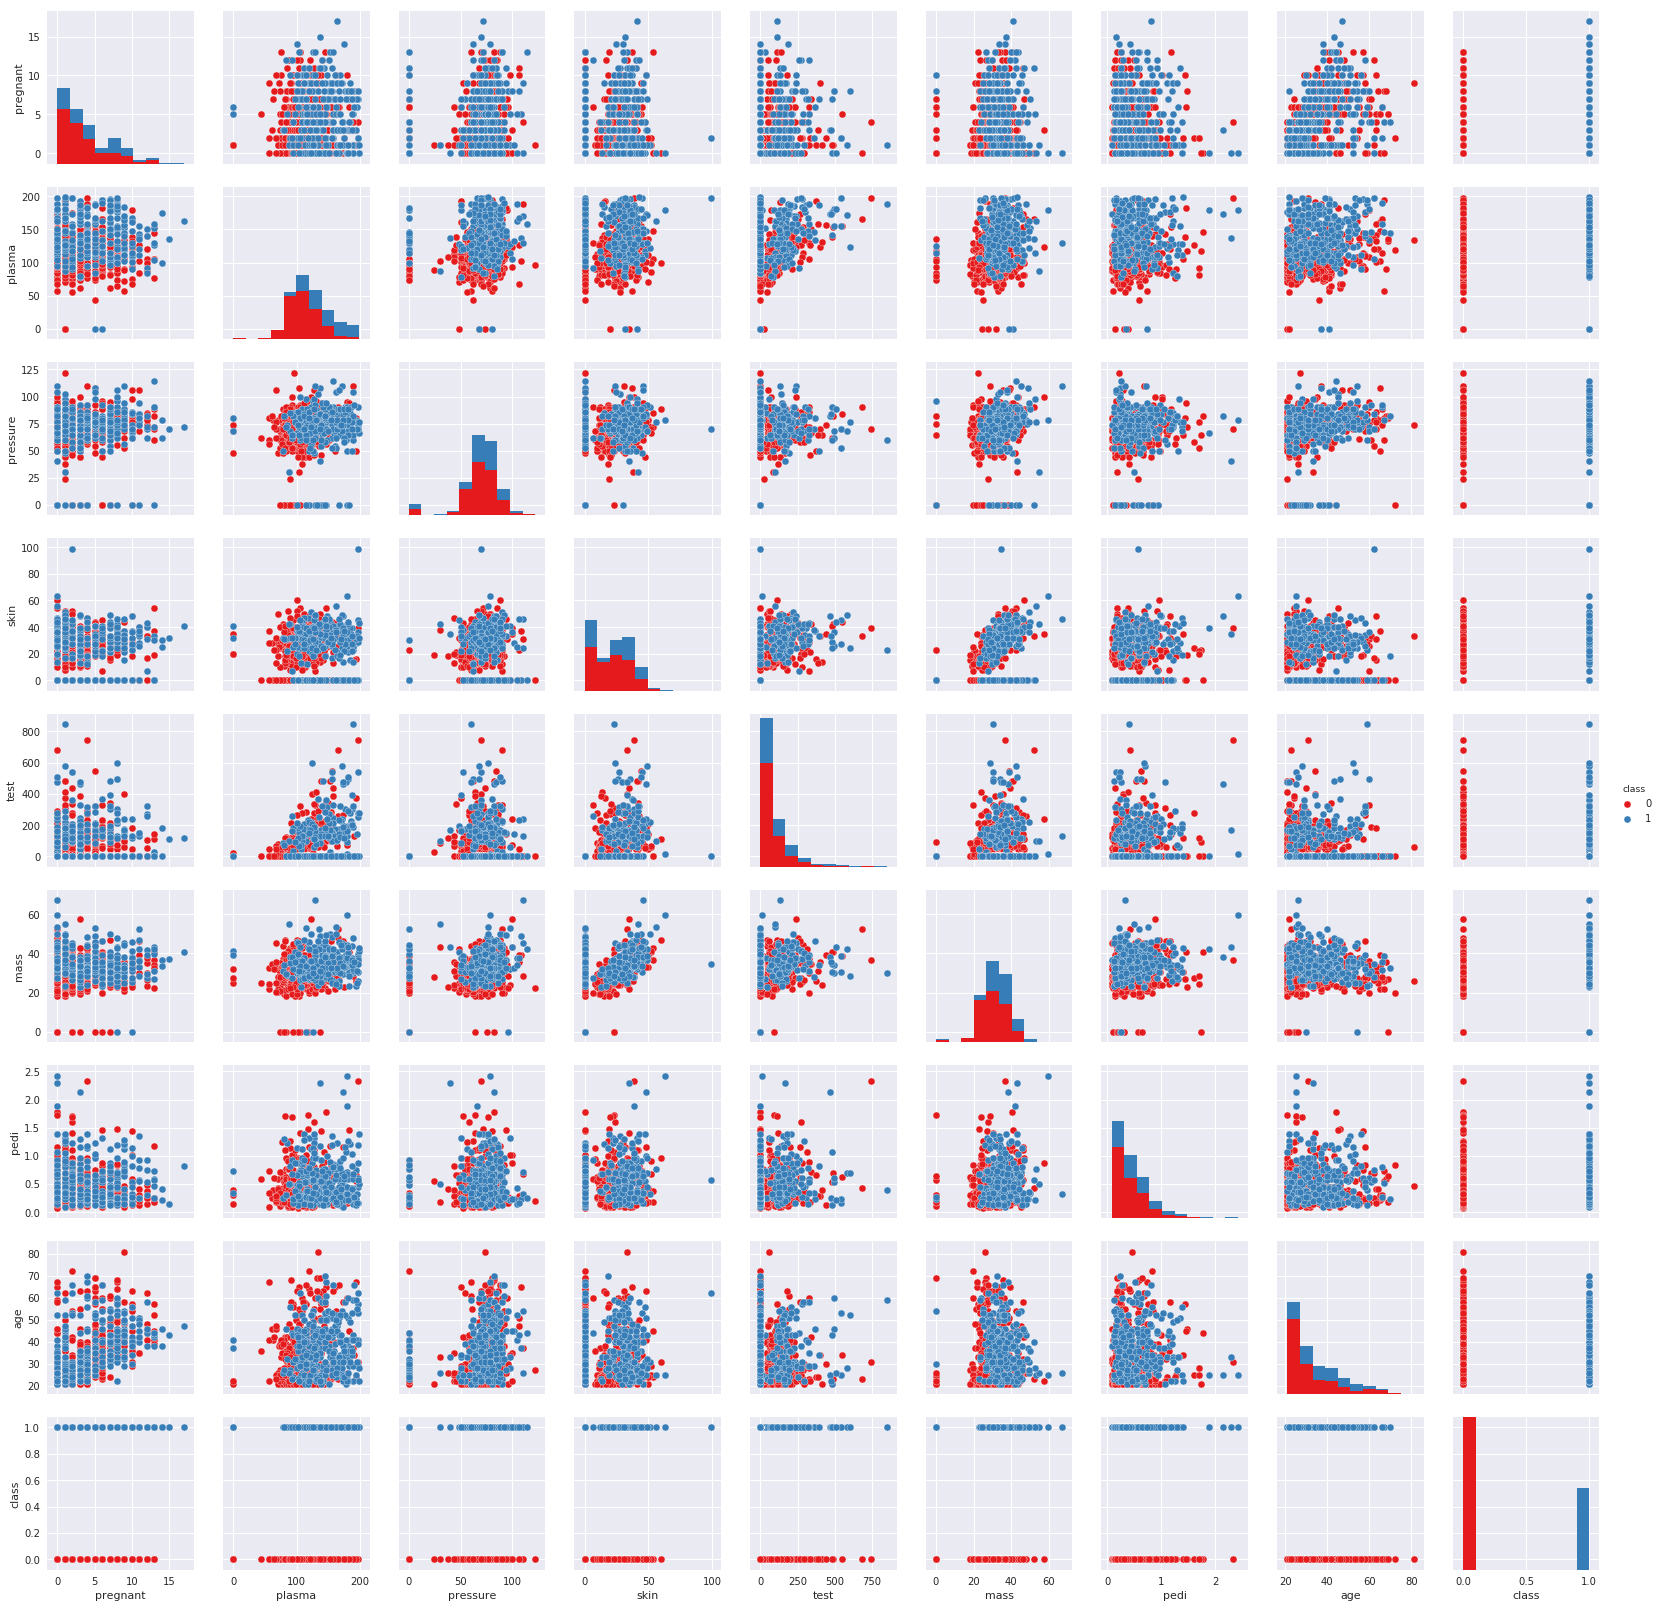

In [53]:
sns.pairplot(pima_df,hue='class',palette='Set1')

In [20]:
pima_df.corr()

,Times_Pregnant,PG_Concnetration,Blood_Pressure,Triceps_thickness,Serum_insulin,BMI,Diabetes_Pedigree,Age,Class
Times_Pregnant,1.000000,0.128213,0.208615,0.032568,-0.073535,0.021546,-0.033523,0.544341,0.221898
PG_Concnetration,0.128213,1.000000,0.218937,0.172143,0.331709,0.231400,0.137327,0.266909,0.492782
Blood_Pressure,0.208615,0.218937,1.000000,0.147809,-0.045769,0.281132,-0.002378,0.324915,0.165723
Triceps_thickness,0.032568,0.172143,0.147809,1.000000,0.244250,0.546951,0.142977,0.054514,0.189065
Serum_insulin,-0.073535,0.331709,-0.045769,0.244250,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231400,0.281132,0.546951,0.185356,1.000000,0.153506,0.025744,0.312249
Diabetes_Pedigree,-0.033523,0.137327,-0.002378,0.142977,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.042163,0.025744,0.033561,1.000000,0.238356
Class,0.221898,0.492782,0.165723,0.189065,0.130548,0.312249,0.173844,0.238356,1.000000


In [21]:
pima_df.corr()["Class"]
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

Times_Pregnant       0.221898
PG_Concnetration     0.492782
Blood_Pressure       0.165723
Triceps_thickness    0.189065
Serum_insulin        0.130548
BMI                  0.312249
Diabetes_Pedigree    0.173844
Age                  0.238356
Class                1.000000
Name: Class, dtype: float64

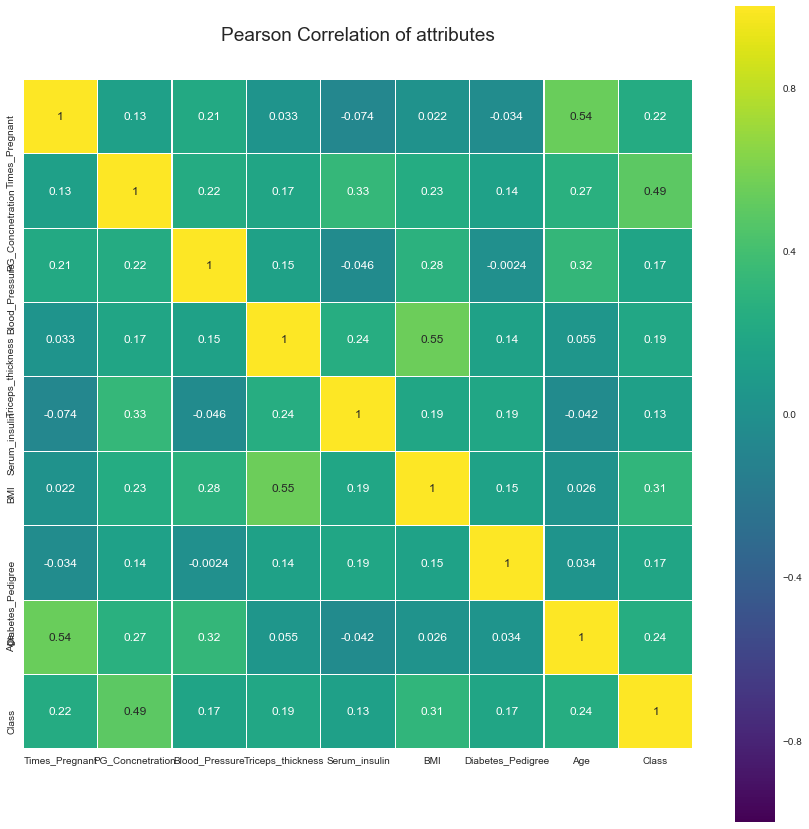

In [24]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(pima_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



In [34]:
#5. Split the data into training and test set in the ratio of 70:30
n=pima_df['Class'].count()
train_set = pima_df.head(int(round(n*0.7))) 
test_set = pima_df.tail(int(round(n*0.3)))

# capture the target column ("class") into separate vectors for training set and test set
train_labels = train_set.pop("Class")
test_labels = test_set.pop("Class")

In [36]:
#6. Create the model using entropy method of reducing the entropy and fit it to training data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [37]:
#Fit the model
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
#7. Test the model on test data
dt_model.score(test_set , test_labels)

0.75652173913043474

In [39]:
test_pred = dt_model.predict(test_set)
y_grid = (np.column_stack([test_pred, test_labels]))

In [40]:
#Generate Cross tab
result = pd.DataFrame(y_grid)
result.columns= ["Predicted","Actual"]
pd.crosstab(result.Predicted,result.Actual, margins = True)

Actual,0,1,All
Predicted,,,
0,124,29,153
1,27,50,77
All,151,79,230


In [41]:
from IPython.display import Image  
from sklearn import tree
from os import system
train_char_label = ['No', 'Yes']
Pima_Tree_File = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Pima_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

Pima_Tree_File.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                        Imp
Times_Pregnant     0.065031
PG_Concnetration   0.291922
Blood_Pressure     0.069034
Triceps_thickness  0.085505
Serum_insulin      0.082092
BMI                0.153634
Diabetes_Pedigree  0.157437
Age                0.095345


In [42]:
#Would you get the same result if you recreate the training and test data using random function?

In [26]:
array = pima_df.values
X = array[:,0:7] 
Y = array[:,8]   
test_size = 0.30
seed = 7  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [27]:
# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy. How does regularization help? Implement the same using Random Forest.
pima_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.80,1:.20}, max_depth = 9, min_samples_leaf=5 )


In [28]:
pima_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, criterion='entropy',
            max_depth=9, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
pima_model.score(X_test, y_test)

0.72727272727272729

In [85]:
predictions = pima_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.71      0.91      0.80       147
        1.0       0.68      0.33      0.45        84

avg / total       0.70      0.70      0.67       231



In [86]:
print(confusion_matrix(y_test,predictions))

[[134  13]
 [ 56  28]]


# Test results are not the same when training and test data are recreated using random function as accuracy score has come down

In [14]:
#-----------------iteration2--------------

In [30]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [44]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model2.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
pima_tree_regularized = open('pima_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model2, out_file= pima_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

pima_tree_regularized.close()

print (pd.DataFrame(dt_model2.feature_importances_, columns = ["Imp"], index = train_set.columns))

                        Imp
Times_Pregnant     0.000000
PG_Concnetration   0.483480
Blood_Pressure     0.000000
Triceps_thickness  0.000000
Serum_insulin      0.094522
BMI                0.200171
Diabetes_Pedigree  0.064747
Age                0.157081


In [46]:
test_pred = dt_model2.predict(test_set)
dt_model2.score(test_set , test_labels)
#There is not much improvement

0.77391304347826084

In [33]:
pima_model2.score(X_test_scaled, y_test)


0.72294372294372289

In [89]:
#----------------random forest---------------

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(train_set, train_labels)

In [48]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.79130434782608694

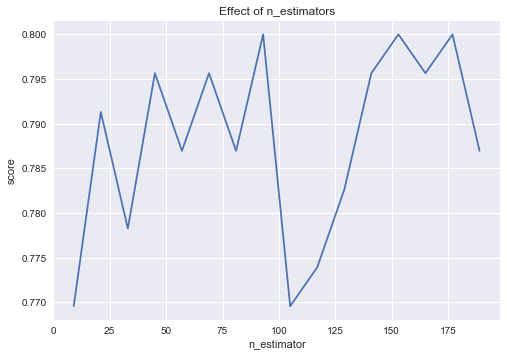

In [49]:
#10.What is the optimal number of trees that gives the best result?
model = RandomForestClassifier(n_jobs=-1, criterion = 'entropy')

estimators = np.arange(9, 201, 12)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(train_set, train_labels)
    scores.append(model.score(test_set, test_labels))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [50]:
tree_array = [estimators,scores]
trees = pd.DataFrame(tree_array).transpose()
trees.columns = ["Trees","Scores"]
trees

,Trees,Scores
0,9.0,0.769565
1,21.0,0.791304
2,33.0,0.778261
3,45.0,0.795652
4,57.0,0.786957
5,69.0,0.795652
6,81.0,0.786957
7,93.0,0.800000
8,105.0,0.769565
9,117.0,0.773913


In [51]:
rf_model = RandomForestClassifier(n_estimators = 350, criterion = 'entropy')
rf_model = rf_model.fit(train_set, train_labels)
test_pred = rf_model.predict(test_set)
rf_model.score(test_set , test_labels)

0.77826086956521734

In [52]:
# ----------------iteration4--------------

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=100)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
predictions = rfc.predict(X_test)

In [66]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.76      0.84      0.80       147
        1.0       0.66      0.55      0.60        84

avg / total       0.73      0.73      0.73       231



In [67]:
print(confusion_matrix(y_test,predictions))

[[123  24]
 [ 38  46]]


In [59]:
rfc.score(X_test, y_test)

0.73160173160173159

In [60]:
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=pima_model, n_estimators=90)  #the base_estimator can be null. The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl)], voting = 'hard')

In [61]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.76 (+/- 0.02) [Logistic Regression]
Accuracy: 0.75 (+/- 0.02) [RandomForest]
Accuracy: 0.75 (+/- 0.02) [NaiveBayes]
Accuracy: 0.76 (+/- 0.02) [Ensemble]
Accuracy: 0.75 (+/- 0.01) [Bagging]
